In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import display

from matplotlib import rc
rc("font", family="serif", size=11)

In [4]:
nstars = 80
nparams = nstars*11+(3*3)+1
print(nparams)

#df = pd.read_csv('hydra/tau_models.csv', names=['kic', 'dnu',
#                    'numax', 'epsilon', 'alpha', 'A', 'G', 'phi', 'tau'])
df = pd.read_csv('../data/stanfits/tau_models_80.csv', names=['kic', 'dnu',
                    'numax', 'epsilon', 'alpha', 'A', 'G', 'phi', 'tau'])
df['kic'] = df['kic'].astype(int)
display(df.describe())

#hier = pd.read_csv('hydra/fullsumm_tau.txt', skiprows=4, nrows=nparams, delim_whitespace=True)
hier = pd.read_csv('../data/stanfits/fullsumm_tau_80.txt', skiprows=4, nrows=nparams, delim_whitespace=True)
#display(hier)
epsA = hier.loc['epsA']['mean']#:'sd']
epsB = hier.loc['epsB']['mean']
alA = hier.loc['alA']['mean']
alB = hier.loc['alB']['mean']
AA = hier.loc['AA']['mean']
AB = hier.loc['AA']['mean']

890


,kic,dnu,numax,epsilon,alpha,A,G,phi,tau
count,8.000000e+01,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,8.564871e+06,5.794806,61.874559,0.117186,0.011468,0.032330,3.133468,1.283864,9.901880
std,2.841594e+06,1.060319,16.134184,0.175602,0.009130,0.046914,0.557996,1.304288,5.935969
min,2.436540e+06,3.905124,44.483323,-0.070725,-0.040647,0.016741,2.240648,-2.906103,1.536480
25%,6.181896e+06,5.053499,50.774853,0.053489,0.010243,0.022424,2.770784,0.724932,8.054164
50%,9.441924e+06,5.630315,56.905526,0.095501,0.012759,0.024599,3.068477,1.493347,10.020399
75%,1.089584e+07,6.282869,65.085448,0.124055,0.015510,0.027447,3.406153,1.922916,10.593414
max,1.236654e+07,9.213417,104.953857,0.975955,0.020141,0.321890,5.059273,6.192703,43.893237


In [5]:
dnus = np.linspace(df['dnu'].min(), df['dnu'].max(), 20)
As = AA * dnus**(-AB)
alphas = alA * dnus**(-alB)
epsilons = epsA + epsB*np.log10(dnus)

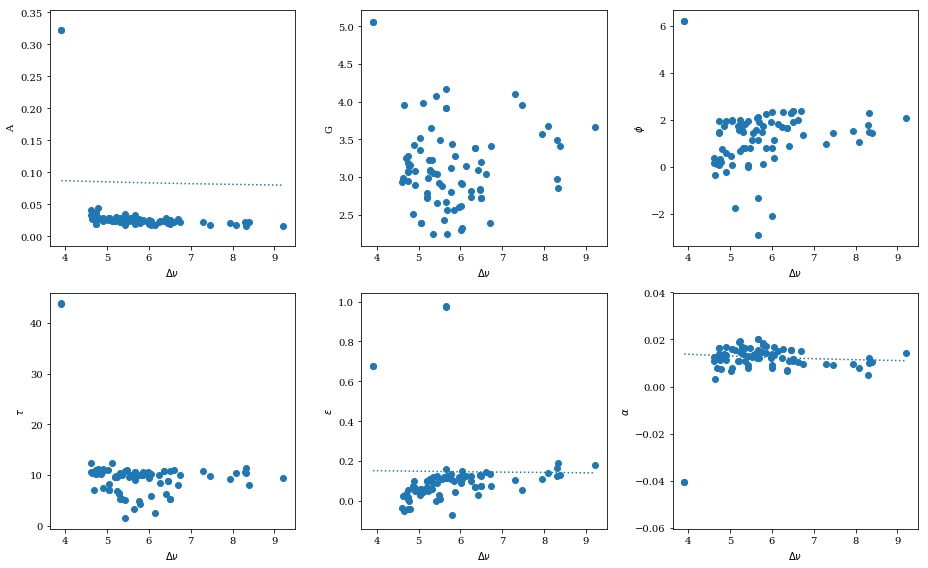

In [6]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(13,8))
ax1.scatter(df['dnu'], df['A'])
ax1.plot(dnus, As, ':')
ax1.set_xlabel(r'$\Delta\nu$')
ax1.set_ylabel('A')

ax2.scatter(df['dnu'], df['G'])
ax2.set_xlabel(r'$\Delta\nu$')
ax2.set_ylabel('G')

ax3.scatter(df['dnu'], df['phi'])
ax3.set_xlabel(r'$\Delta\nu$')
ax3.set_ylabel(r'$\phi$')

ax4.scatter(df['dnu'], df['tau'])
ax4.set_xlabel(r'$\Delta\nu$')
ax4.set_ylabel(r'$\tau$')

ax5.scatter(df['dnu'], df['epsilon'])
ax5.plot(dnus, epsilons, ':')
ax5.set_xlabel(r'$\Delta\nu$')
ax5.set_ylabel(r'$\epsilon$')

ax6.scatter(df['dnu'], df['alpha'])
ax6.plot(dnus, alphas, ':')
ax6.set_xlabel(r'$\Delta\nu$')
ax6.set_ylabel(r'$\alpha$')

plt.tight_layout()
plt.show()

In [7]:
apokasc = pd.read_csv('../data/APOKASCfull.csv', usecols=['KIC', 'Teff', '[M/H]1', 'M1', 'R1'])
apokasc = apokasc.replace('        ', np.nan)
#display(apokasc)

metals = []
for i in df['kic']:
    if any(apokasc['KIC'] == i):
        t = apokasc.loc[(apokasc.KIC == i)]['[M/H]1'].values
        metals.append(t[0])
    else:
        metals.append(np.nan)

df['[M/H]'] = metals
display(df.head())

,kic,dnu,numax,epsilon,alpha,A,G,phi,tau,[M/H]
0,10753962,8.082074,101.938147,0.139641,0.007837,0.018225,3.675029,1.039611,10.510445,0.05
1,10416550,5.053583,47.827597,0.060944,0.015868,0.029056,2.392023,1.974237,7.111999,-0.23
2,4548564,6.005279,57.266011,0.120630,0.013921,0.024824,2.290974,2.313780,10.400283,-0.33
3,5374118,5.664850,61.906643,0.975955,0.020141,0.023944,3.919640,-2.906103,10.554832,-0.01
4,6851499,5.610249,52.513760,0.118125,0.014214,0.027873,2.425340,1.557023,9.811309,-0.22


/home/daniel/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


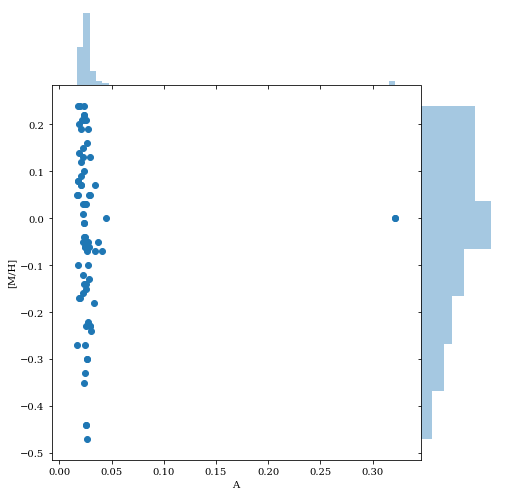

In [8]:
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))
ax1 = sns.jointplot(df['A'], df['[M/H]'], height=7, space=0)

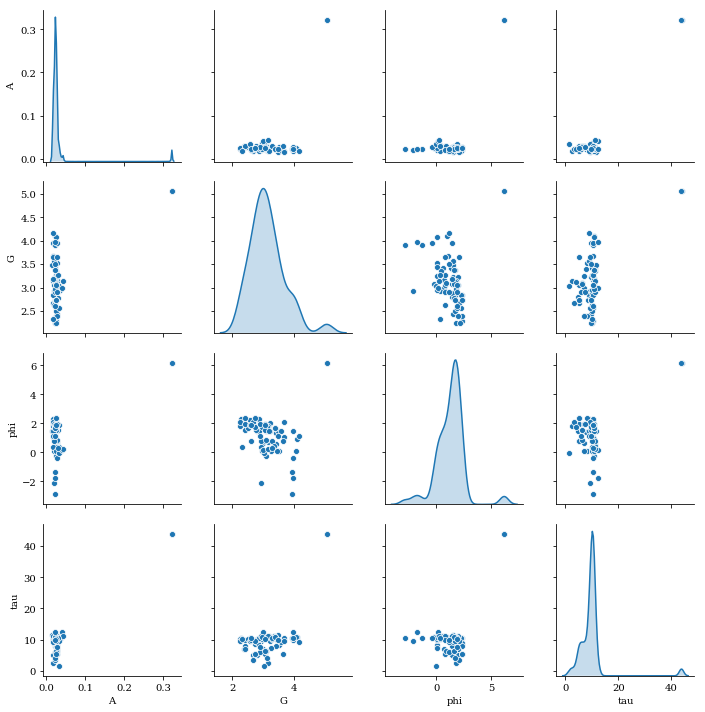

In [9]:
 g = sns.pairplot(df, vars=["A", "G", "phi", "tau"], diag_kind='kde')